In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stat

1. Загрузка данных

In [3]:
ds_store = pd.read_csv('interview_store.csv', low_memory=False)
ds_train = pd.read_csv('interview_train.csv', low_memory=False)

2. Обработка данных

In [4]:
#разделить датасает на праздничные и не праздничные дни##################################################################################################
ds_train1 = ds_train.loc[(ds_train['Open'] == 1)] #исключаем дни в которые магазин закрыт, для правильного подсчета средних
ds_train1['Date'] = pd.to_datetime(ds_train1['Date'])

C:\Temp\ipykernel_3660\2746936375.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_train1['Date'] = pd.to_datetime(ds_train1['Date'])


3. Распределение переменных 

[519.0, 676.0, 893.0]


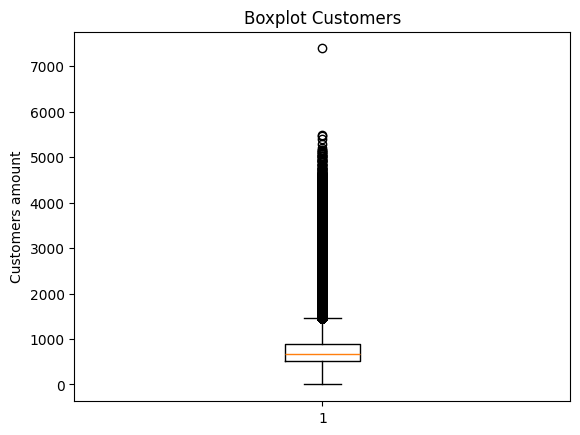

In [5]:
fig, ax = plt.subplots()
plt.boxplot(data=ds_train1, x='Customers')
ax.set_title('Boxplot Customers')
ax.set_ylabel('Customers amount')
print(stat.quantiles(ds_train1['Customers']))
plt.show()

[4859.0, 6369.0, 8360.0]


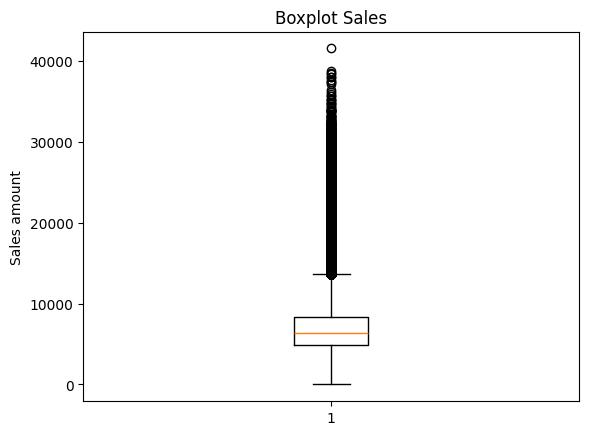

In [6]:
fig, ax = plt.subplots()
plt.boxplot(data=ds_train1, x='Sales')
ax.set_title('Boxplot Sales')
ax.set_ylabel('Sales amount')
print(stat.quantiles(ds_train1['Sales']))
plt.show()

Text(0, 0.5, 'Amount')

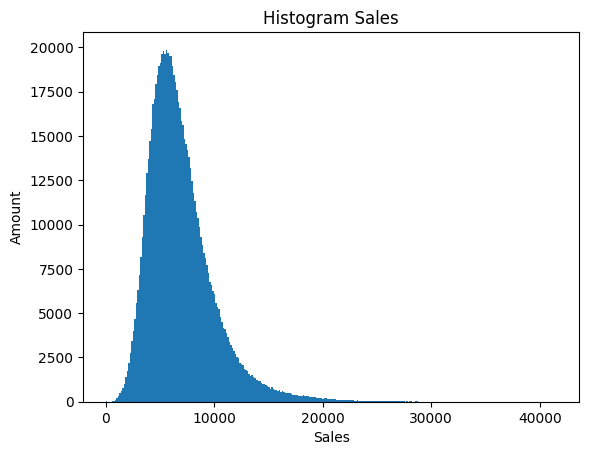

In [7]:
fig, ax = plt.subplots()
plt.hist(ds_train1['Sales'],bins=300)
ax.set_title('Histogram Sales')
ax.set_xlabel('Sales')
ax.set_ylabel('Amount')

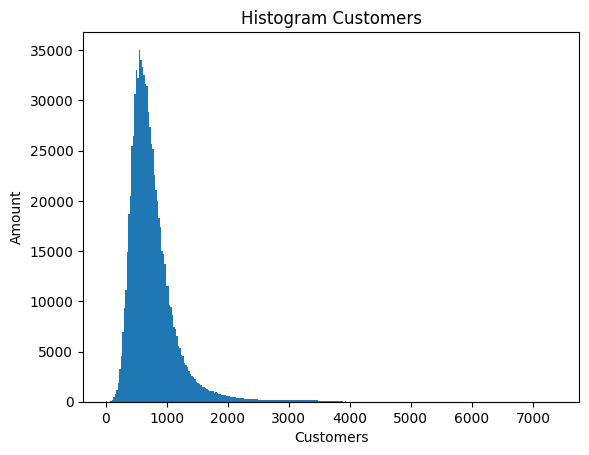

In [8]:
fig, ax = plt.subplots()
plt.hist(ds_train1['Customers'],bins=300)
ax.set_title('Histogram Customers')
ax.set_xlabel('Customers')
ax.set_ylabel('Amount')
plt.show()

[712.5, 2325.0, 6887.5]


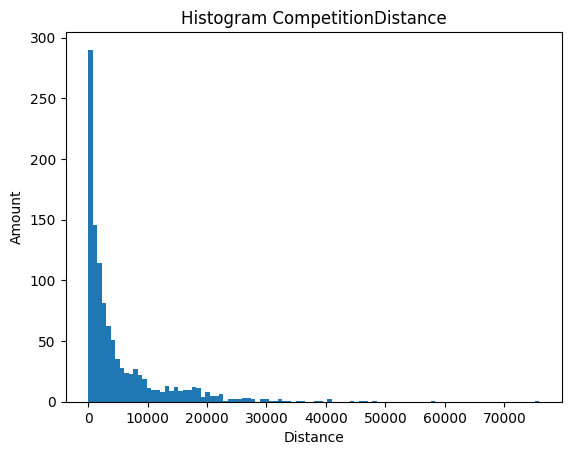

In [9]:
CompetitionDistanceNotNaN = ds_store[(ds_store['CompetitionDistance'].notna())]
fig, ax = plt.subplots()
ax.set_title('Histogram CompetitionDistance')
ax.set_xlabel('Distance')
ax.set_ylabel('Amount')
plt.hist(x=CompetitionDistanceNotNaN['CompetitionDistance'],bins=100)
print(stat.quantiles(CompetitionDistanceNotNaN['CompetitionDistance']))
plt.show()

[712.5, 2325.0, 6887.5]


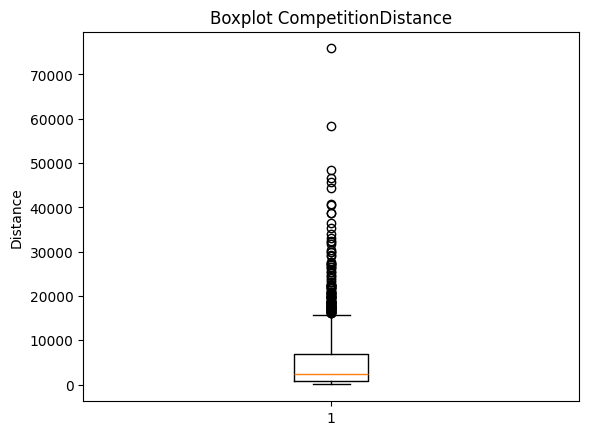

In [11]:
fig, ax = plt.subplots()
plt.boxplot(x = CompetitionDistanceNotNaN['CompetitionDistance'])
ax.set_ylabel('Distance')
ax.set_title('Boxplot CompetitionDistance')
print(stat.quantiles(CompetitionDistanceNotNaN['CompetitionDistance']))
plt.show()

4. Коррелиции между переменными

np.float64(0.8235967321975461)

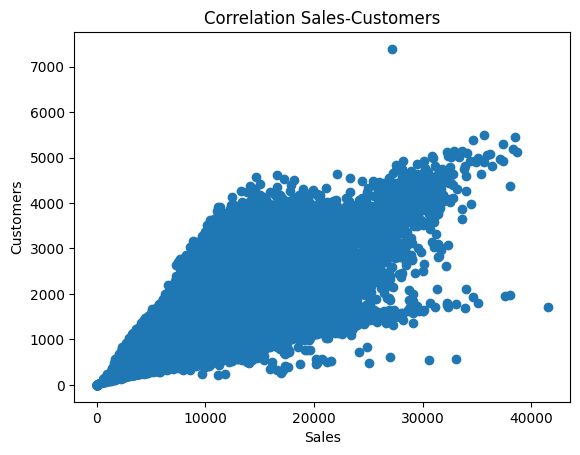

In [10]:
#исследование корреляции между продажами и покупателями
fig, ax = plt.subplots()
plt.scatter(data=ds_train1,x='Sales',y='Customers')
ax.set_xlabel('Sales')
ax.set_ylabel('Customers')
ax.set_title('Correlation Sales-Customers')
correlation1 = ds_train1['Sales'].corr(ds_train1['Customers'])
correlation1

Изучение влияния праздников на объемы продаж

In [11]:
#вынести агазины с одинаковыми полями StoreType Assortement, CompetitionOpenSinceMonth = NaN, Promo2 = 0, PromoInterval одинаковый.
dss = ds_store[['Store','StoreType','Assortment','CompetitionOpenSinceMonth','Promo2','PromoInterval']]
dss = dss.loc[(dss['StoreType'] == 'a')]
dss = dss.loc[(dss['Assortment'] == 'a')]
dss = dss.loc[(dss['CompetitionOpenSinceMonth'].isna())]
dss = dss.loc[(dss['Promo2'] == 0)]
ds_train_sales = ds_train1[(ds_train1['Store'].isin(dss['Store']))]
#Создание датасета с идентичными магазинами  #########################################################################################################
ds_train_sales.loc[(ds_train_sales['Promo'] == 0)]
ds_train_SchoolHoliday = ds_train_sales.loc[(ds_train_sales['SchoolHoliday'] == 1)]
#ds_train_SchoolHoliday = ds_train_SchoolHoliday.loc[(ds_train_SchoolHoliday['Date'].dt.month == 2)]
ds_train_SchoolHoliday = ds_train_SchoolHoliday.loc[(ds_train_SchoolHoliday['Date'].dt.year == 2015)]
sum_holiday = ds_train_SchoolHoliday['Sales'].sum()
mean_holiday = ds_train_SchoolHoliday['Sales'].mean()
ds_train_NotHoliday = ds_train_sales.loc[(ds_train_sales['SchoolHoliday'] == 0)]
#ds_train_NotHoliday = ds_train_NotHoliday.loc[(ds_train_NotHoliday['Date'].dt.month == 2)]
ds_train_NotHoliday = ds_train_NotHoliday.loc[(ds_train_NotHoliday['Date'].dt.year == 2015)]
sum_NotHoliday = ds_train_NotHoliday['Sales'].sum()
mean_NotHoliday = ds_train_NotHoliday['Sales'].mean()

9770949 41350057 31579108


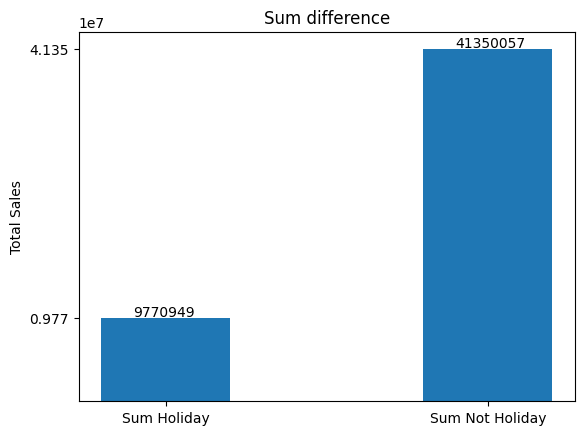

In [12]:
mean_holiday = np.int64(mean_holiday)
mean_holiday
fig, ax = plt.subplots()
indexes_sum, values_sum = ['Sum Holiday','Sum Not Holiday'], [sum_holiday,sum_NotHoliday]
a = ax.bar(indexes_sum,values_sum,width=0.4)
for index, value in enumerate(values_sum):
    plt.text(index-0.1,value+200000, str(value))
ax.set_yticks([sum_holiday,sum_NotHoliday])
ax.set_ylabel('Total Sales')
ax.set_title('Sum difference')
print(sum_holiday,sum_NotHoliday,sum_NotHoliday-sum_holiday)

-563.0891528107677


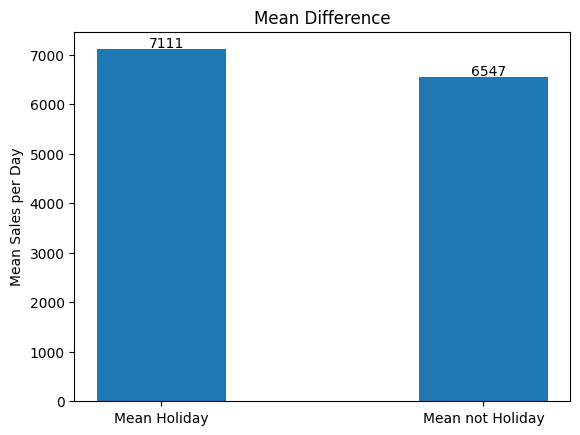

In [13]:
fig, ax = plt.subplots()
name, data = ['Mean Holiday', 'Mean not Holiday'], [mean_holiday,mean_NotHoliday]
data = np.int64(data)
b = ax.bar(name,data,width=0.4)
ax.set_title('Mean Difference')
ax.set_ylabel('Mean Sales per Day')
for i,b in enumerate(data):
    plt.text(i-0.04,b+40,str(b))
print(mean_NotHoliday-mean_holiday)
plt.show()

5. Выявление самых прибыльных магазинов  за 2015 год


In [14]:
ds_2015 = ds_train1[ds_train1['Date'].dt.year == 2015]
group = ds_2015.groupby(by=ds_2015['Store'],as_index=False)['Sales'].sum()
group = group.sort_values(ascending=False, by='Sales')
group = group.reset_index(drop=True)
group = group.reset_index() 
group['index'] = group['index'] + 1
arr = np.cumsum(group['Sales'])
total_sales = group['Sales'].sum()
group['Cumsum'] = arr
cumsum_most_expensive = np.cumsum(group['Sales'].loc[(group['index']<=130)]) # 130 берется из визуальных наблюдений на графике ниже  
percent_totalSales = cumsum_most_expensive.loc[129] / total_sales * 100
percent_totalShops = 129 / 1114 * 100
print(f'{percent_totalShops}% магазинов генерируют {percent_totalSales}% прибыли')

11.579892280071814% магазинов генерируют 19.87969132569255% прибыли


In [15]:

group['Percent of total Sales'] = group['Cumsum'].map(lambda x: x / total_sales * 100)
group['Percent of total Shops'] = group['index'] / 1115 * 100

In [16]:
Percent_of_total_Sales_int = np.int64(group['Percent of total Sales'])
group['Percent of total Sales INT'] = Percent_of_total_Sales_int
b = group.loc[(group['Percent of total Sales INT'].isin([10,20,30,40,50,60,70,80,90]))]
b['Percent of total Sales INT'] = b['Percent of total Sales INT'].drop_duplicates()
b = b.dropna()
b['Percent of total Shops INT'] = np.int64(b['Percent of total Shops'])
shops, sales = b['Percent of total Shops INT'], b['Percent of total Sales INT']
for i,o in zip(shops,sales):
    print(f'≈{i}% магазинов обеспечивают {o}% продаж')

≈4% магазинов обеспечивают 10.0% продаж
≈11% магазинов обеспечивают 20.0% продаж
≈19% магазинов обеспечивают 30.0% продаж
≈28% магазинов обеспечивают 40.0% продаж
≈37% магазинов обеспечивают 50.0% продаж
≈47% магазинов обеспечивают 60.0% продаж
≈58% магазинов обеспечивают 70.0% продаж
≈70% магазинов обеспечивают 80.0% продаж
≈83% магазинов обеспечивают 90.0% продаж


C:\Temp\ipykernel_6320\1242014991.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  b['Percent of total Sales INT'] = b['Percent of total Sales INT'].drop_duplicates()


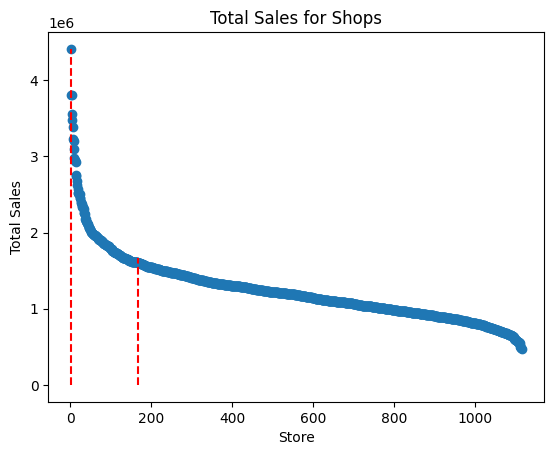

,index,Store,Sales,Cumsum,Percent of total Sales,Percent of total Shops,Percent of total Sales INT,Percent of total Shops INT
131,132,167,1670376,279569225,20.120137,11.838565,20.0,11


In [17]:
percent20 = b.loc[(b['Percent of total Sales INT'] == 20)] 
fig, ax = plt.subplots()
plt.scatter(x=group['index'],y=group['Sales'])
ax.vlines(x=group['Store'].min(),ymin=0,ymax=group['Sales'].max(),colors='red',linestyles='dashed')
ax.vlines(x=percent20['Store'],ymin=0,ymax=percent20['Sales'],colors='red',linestyles='dashed') # окончание 20 процентов
ax.set_ylabel('Total Sales')
ax.set_xlabel('Store')
ax.set_title('Total Sales for Shops')
plt.show()
percent20
